# UR SLS Comparison SPOT ES

Dari hasil sebelumnya, dapat dilihat densenet121 adalah model terbaik untuk mengklasfikari desa urban dan rural dengan model data : SLS dan Square Neighbour. Skenario tersebut akan digunakan untuk menguji efek resolusi terhadap klasifikasi dengan melakukan train terhadapa uncovered desa baik dengan data sentinel maupun spot.

Pada proses clipping citra , ditemukan 577 desa dengan tutupan awan tinggi untuk satelit SPOT 6-7 seperti yang dapat dilihat pada Gambar 6. Sehingga pada kajian efek resolusi citra terhadap model akan dilakukan pada 5380 desa dan 200.200 SLS.

#### Import Fast AI

In [1]:
import fastai
from fastai.vision.all import *
import pandas as pd

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,balanced_accuracy_score
import numpy as np

In [3]:
sls = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/3200_sls.csv")

C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
sls.head()

,id,kdprov,kdkab,kdkec,kddesa,iddesa,idslsnon,nmslsnon,ketua_sls,jenis,...,j_bstt,j_bsbtt,j_bstt_k,j_bskeko,j_segmen,dom,ldom,j_m_all,j_m_30,klas_ur
0,263884,32,1,10,1,3201010001,100,RT 001 RW 001 DUSUN 1,MUHAMAD RAFLI HIDAYAT,1,...,39,1,2,4,1,1,1,51,51,2
1,263885,32,1,10,1,3201010001,200,RT 002 RW 001 DUSUN 1,NURMAN,1,...,60,2,0,7,1,1,1,62,61,2
2,263886,32,1,10,1,3201010001,300,RT 003 RW 001 DUSUN 1,SAENUDIN,1,...,50,2,0,6,1,1,1,58,57,2
3,263887,32,1,10,1,3201010001,400,RT 004 RW 001 DUSUN 1,AEP,1,...,27,1,0,1,1,1,1,31,31,2
4,263888,32,1,10,1,3201010001,500,RT 005 RW 001 DUSUN 1,JEJEN JAELANI,1,...,49,7,3,8,3,1,1,63,57,2


In [5]:
sls.iddesa.unique().shape

(5957,)

In [6]:
ur_path = "C:/Users/jwst2/Python/tesis/jpg/UR/13. Resolution compare sls SPOT"
gen_path =  "C:/Users/jwst2/Python/tesis/jpg/general sls spot ES RES/"
test_path = 'C:/Users/jwst2/Python/tesis/jpg/UR/test sls spot ES RES/'
model_code_resnet = "R013"
model_code_dense = "D013"

In [13]:
os.chdir(ur_path)
if os.path.isdir('urban') is False:
    os.makedirs('urban')
    os.makedirs('rural')

In [14]:
yourpath = gen_path
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        try :
            if(sls.klas_ur[sls.iddesa == int(name.replace(".jpg","")[:10])].iloc[0] == 1):
                shutil.copy(os.path.join(root, name), ur_path+"/urban/"+name)
            elif(sls.klas_ur[sls.iddesa == int(name.replace(".jpg","")[:10])].iloc[0] == 2):
                shutil.copy(os.path.join(root, name),ur_path+ "/rural/"+name)
        except Exception:
            print(name)
            pass 

1it [13:39, 819.28s/it]


In [19]:
split = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/01 datasplit_ur_desa_uncovered.csv")

In [20]:
split.head()

,iddesa,klas_ur,stat
0,3207110010,1,train
1,3205200018,1,train
2,3210070011,1,train
3,3211010004,1,train
4,3201290007,1,train


In [21]:
split_test =split[split["stat"] == "test"]

In [22]:
split_test

,iddesa,klas_ur,stat
4840,3213080006,2,test
4841,3212081006,2,test
4842,3276050006,1,test
4843,3203010002,2,test
4844,3208161002,1,test
...,...,...,...
5373,3276040009,1,test
5374,3214070007,1,test
5375,3209120023,1,test
5376,3202280008,1,test


#### Pembentukan test set

In [23]:
os.chdir(test_path)
if os.path.isdir('urban') is False:
    os.makedirs('urban')
    os.makedirs('rural')

In [24]:
yourpath = ur_path+ "/rural"
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        try :
            if(split_test.iddesa.astype(str).str.contains(name[:10]).sum() > 0):
                shutil.move(os.path.join(root, name),test_path + "/rural/"+name)
        except Exception:
            print(name)
            pass 

1it [00:26, 26.61s/it]


In [25]:
yourpath =  ur_path+ "/urban"
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        try :
            if(split_test.iddesa.astype(str).str.contains(name[:10]).sum() > 0):
                shutil.move(os.path.join(root, name), test_path +"/urban/"+name)
        except Exception:
            print(name)
            pass 

1it [01:45, 105.52s/it]


#### Processing data SPOT tingkat SLS

In [7]:
path = Path.cwd() / (ur_path)

In [8]:
Path.BASE_PATH = path
path.ls()

(#2) [Path('rural'),Path('urban')]

In [9]:
fname = (path/"rural").ls()[0]
fname

Path('rural/32010100010001.jpg')

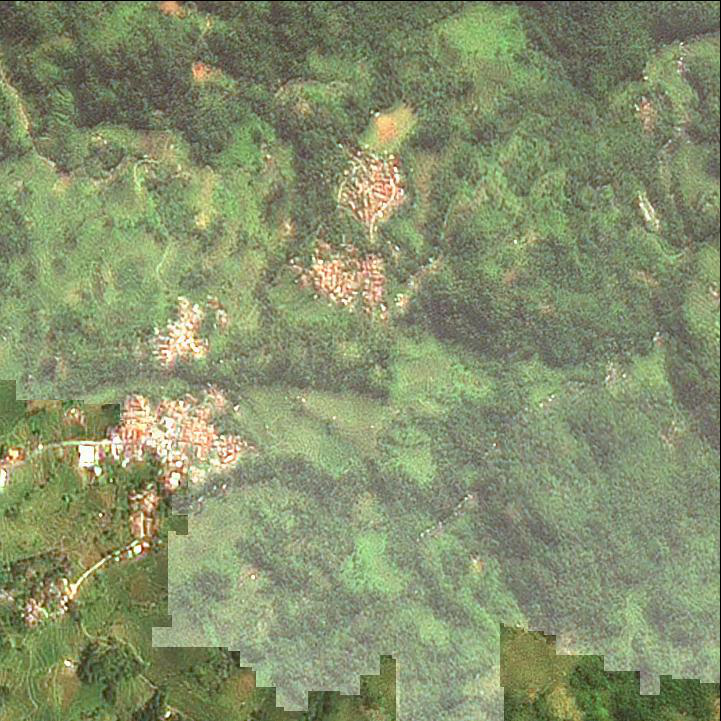

In [10]:
img = Image.open(fname)
img

In [11]:
blocks = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, # finds the images in the path
                 splitter=RandomSplitter(valid_pct=0.1, seed=42),  # default random split 80% training, 20% validation
                 get_y=parent_label # extracts the label category from the image's folder name 
                 ,item_tfms = Resize(64)) # data augmentation (mult multiplies the default transformation values)

In [12]:
dls = blocks.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


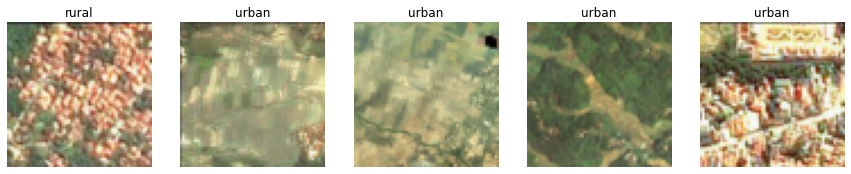

In [13]:
dls.show_batch(nrows=1, ncols=5)

In [14]:
avg = 'macro'
roca = RocAucBinary(average=avg)
f1s = F1Score(average=avg)
bc = BalancedAccuracy()
metrics=[accuracy,bc, Precision(average=avg), Recall(average=avg), f1s, roca]
learn = cnn_learner(dls, densenet121, metrics=metrics) 

In [15]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.366045,0.342552,0.841518,0.676393,0.759919,0.676393,0.702876,0.864192,34:04
1,0.335703,0.328070,0.847037,0.711890,0.762676,0.711890,0.731795,0.878105,27:28
2,0.323391,0.323424,0.849992,0.700554,0.774350,0.700554,0.726433,0.881146,27:12


C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (123587689 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (123587689 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (123587689 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (123587689 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (1235

In [16]:
learn.unfreeze()

In [17]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.348885,0.340901,0.842076,0.659788,0.771004,0.659788,0.689360,0.868310,30:20
1,0.362182,0.426533,0.834495,0.639637,0.755282,0.639637,0.666715,0.851405,30:37
2,0.350703,0.346300,0.839623,0.690655,0.750037,0.690655,0.712296,0.863216,30:05
3,0.357827,0.351574,0.837059,0.672326,0.748446,0.672326,0.696932,0.857565,29:25
4,0.323142,0.328345,0.845922,0.714112,0.759542,0.714112,0.732370,0.879209,29:48
5,0.328259,0.346518,0.846758,0.672200,0.779855,0.672200,0.702760,0.882091,30:21
6,0.320579,0.316865,0.850828,0.717485,0.770279,0.717485,0.738173,0.887228,30:34
7,0.291773,0.315429,0.851887,0.705619,0.777530,0.705619,0.731282,0.890797,31:03
8,0.271571,0.322745,0.849100,0.729583,0.763378,0.729583,0.744068,0.888668,30:27
9,0.276322,0.323271,0.846981,0.726971,0.759390,0.726971,0.740915,0.888141,54:37


C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (123587689 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (123587689 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (123587689 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (123587689 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (1235

In [18]:
dls.vocab

['rural', 'urban']

In [20]:
dls.train.items[17000]

Path('urban/32710400040026.jpg')

In [21]:
learn.export("C:/Users/jwst2/Python/tesis/models/19042022"+ model_code_dense+".pkl")

### Up level

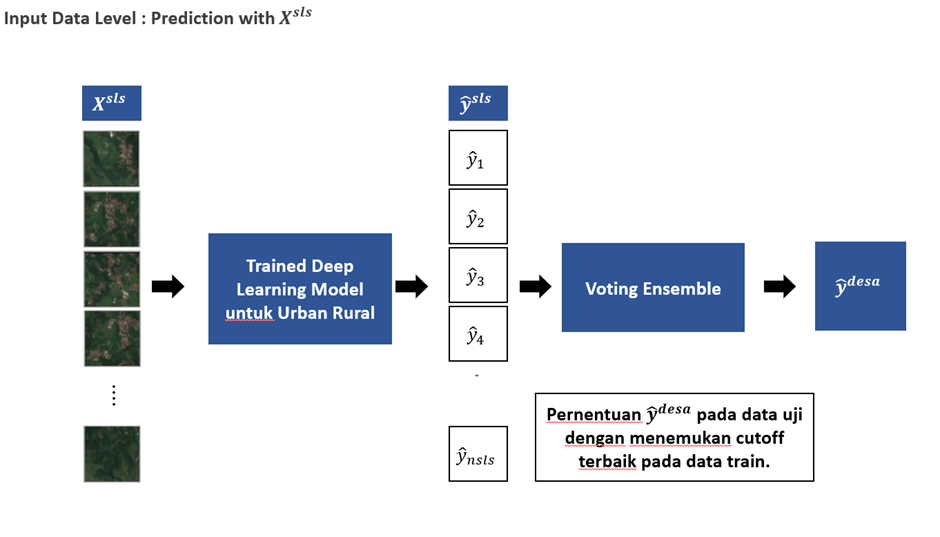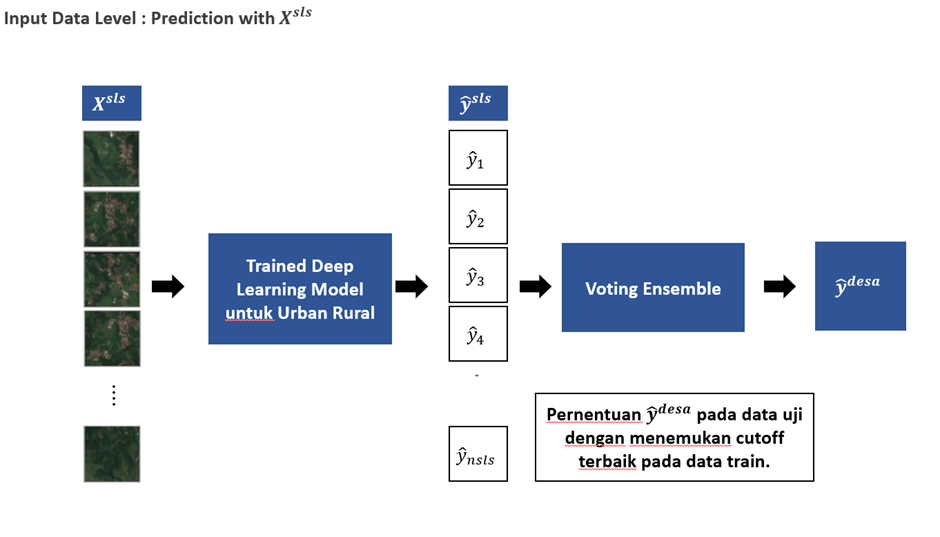

In [22]:
idx_train = []
for i in dls.train.items:
    idx_train.append(str(i)[-18:-4])
true_label = []
for i in dls.train.items:
    if("urban" in str(i)) :
        true_label.append(1)
    else :
        true_label.append(0)

In [23]:
preds,_ = learn.get_preds(ds_idx  = 0)
result_train = preds.numpy()
new_train = pd.DataFrame(result_train)

C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (123587689 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (123587689 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [24]:
pd.value_counts(true_label)

1    129800
0     31652
dtype: int64

In [25]:
df = new_train
df["idsls"] = idx_train 
df["stat"] = round(df[1])
df["iddesa"] = df.idsls.str[:10]
df.head()

,0,1,idsls,stat,iddesa
0,9.357719e-04,0.999064,32110300100010,1.0,3211030010
1,3.762362e-02,0.962376,32151500010027,1.0,3215150001
2,4.291864e-01,0.570814,32111710040030,1.0,3211171004
3,4.305440e-01,0.569456,32021000040016,1.0,3202100004
4,1.135220e-07,1.000000,32160900010100,1.0,3216090001


In [26]:
pd.value_counts(df.stat)

1.0    134250
0.0     27202
Name: stat, dtype: int64

In [27]:
df["true_lab"] = true_label

In [28]:
pd.value_counts(df.true_lab)

1    129800
0     31652
Name: true_lab, dtype: int64

In [29]:
accuracy_score(df.stat.apply(int),df.true_lab.apply(int))

0.8822931893070386

In [30]:
df.head()

,0,1,idsls,stat,iddesa,true_lab
0,9.357719e-04,0.999064,32110300100010,1.0,3211030010,1
1,3.762362e-02,0.962376,32151500010027,1.0,3215150001,1
2,4.291864e-01,0.570814,32111710040030,1.0,3211171004,1
3,4.305440e-01,0.569456,32021000040016,1.0,3202100004,0
4,1.135220e-07,1.000000,32160900010100,1.0,3216090001,1


In [31]:
desa_pred = df.groupby('iddesa').agg({'stat': ['mean'], 'true_lab': 'mean'})

In [32]:
desa_pred.columns = ["pred","true"]

In [33]:
pd.value_counts(df.stat)

1.0    134250
0.0     27202
Name: stat, dtype: int64

In [34]:
for i in np.arange(0.1, 0.95, 0.025):
    value = round(i,2)
    desa_pred["label"+str(value)] = 0
    desa_pred["label"+str(value)][desa_pred.pred > value] = 1

C:\Users\jwst2\AppData\Local\Temp/ipykernel_18456/935834860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desa_pred["label"+str(value)][desa_pred.pred > value] = 1
C:\Users\jwst2\AppData\Local\Temp/ipykernel_18456/935834860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desa_pred["label"+str(value)][desa_pred.pred > value] = 1
C:\Users\jwst2\AppData\Local\Temp/ipykernel_18456/935834860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [35]:
desa_pred.head()

,pred,true,label0.1,label0.12,label0.15,label0.18,label0.2,label0.22,label0.25,label0.27,...,label0.7,label0.72,label0.75,label0.77,label0.8,label0.82,label0.85,label0.87,label0.9,label0.92
iddesa,,,,,,,,,,,,,,,,,,,,,
3201010001,0.185185,0.0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3201010003,0.717949,1.0,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3201010004,0.555556,0.0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3201010005,0.548387,1.0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3201010006,0.310345,0.0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
for j in range(2,36):
    print("result", desa_pred.columns[j])
    print("accuracy :",  accuracy_score( desa_pred.true,desa_pred.iloc[:,[j]]))
    print("precision :",  precision_score( desa_pred.true,desa_pred.iloc[:,[j]]))

result label0.1
accuracy : 0.7863636363636364
precision : 0.7769097222222222
result label0.12
accuracy : 0.7909090909090909
precision : 0.7810043668122271
result label0.15
accuracy : 0.7975206611570248
precision : 0.7870044052863436
result label0.18
accuracy : 0.8072314049586777
precision : 0.7956318252730109
result label0.2
accuracy : 0.8159090909090909
precision : 0.8036961911201262
result label0.22
accuracy : 0.821900826446281
precision : 0.808983666061706
result label0.25
accuracy : 0.8353305785123967
precision : 0.821683967704729
result label0.27
accuracy : 0.8373966942148761
precision : 0.8241834607366226
result label0.3
accuracy : 0.8477272727272728
precision : 0.8341543513957307
result label0.32
accuracy : 0.8541322314049586
precision : 0.8407477520113582
result label0.35
accuracy : 0.8613636363636363
precision : 0.8487676477626226
result label0.37
accuracy : 0.8673553719008265
precision : 0.8553838725253501
result label0.4
accuracy : 0.8774793388429752
precision : 0.8685052942

In [37]:
pd.value_counts(desa_pred.true)

1.0    3586
0.0    1254
Name: true, dtype: int64

### Test result

In [38]:
path_pred = Path.cwd() / (test_path)
test_files = [fn for fn in sorted((path_pred).glob('**/*')) if fn.is_file()]

In [39]:
len(test_files)

20905

In [40]:
test_dl = learn.dls.test_dl(test_files)

In [41]:
preds,_ = learn.get_preds(dl  =test_dl)

In [42]:
str(test_files[1])[-18:-4]

'32010100020002'

In [43]:
idx_test = []
for i in test_files:
    idx_test.append(str(i)[-18:-4])
true_label = []
for i in test_files:
    if("urban" in str(i)) :
        true_label.append(1)
    else :
        true_label.append(0)

In [44]:
test = pd.DataFrame(preds)

In [45]:
test["idsls"] = idx_test
test["true_lab"] = true_label

In [46]:
test["iddesa"] = test.idsls.str[:10]
test["stat"] = round(test[1])

In [47]:
test.head()

,0,1,idsls,true_lab,iddesa,stat
0,0.808513,0.191487,32010100020001,0,3201010002,0.0
1,0.586067,0.413933,32010100020002,0,3201010002,0.0
2,0.609961,0.390039,32010100020003,0,3201010002,0.0
3,0.710484,0.289516,32010100020004,0,3201010002,0.0
4,0.872367,0.127633,32010100020005,0,3201010002,0.0


In [48]:
desa_pred_test = test.groupby('iddesa').agg({'stat': ['mean'], 'true_lab': 'mean'})

In [49]:
desa_pred_test

,stat,true_lab
,mean,mean
iddesa,,
3201010002,0.750000,0.0
3201020016,1.000000,1.0
3201021008,0.833333,1.0
3201030012,1.000000,1.0
3201040007,1.000000,1.0
...,...,...
3278031006,1.000000,1.0
3279010001,0.517241,1.0


In [50]:
desa_pred_test.columns = ["pred","true"]

In [62]:
desa_pred_test["pred_lab"] = 0
desa_pred_test["pred_lab"][desa_pred_test.pred > 0.775] = 1

C:\Users\jwst2\AppData\Local\Temp/ipykernel_18456/2742235302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desa_pred_test["pred_lab"][desa_pred_test.pred > 0.775] = 1


In [63]:
print("accuracy :",  accuracy_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("balanced_accuracy_score :",  balanced_accuracy_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("precision :",  precision_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("recall :",  recall_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("f1 :",  f1_score( desa_pred_test.true,desa_pred_test.pred_lab))
print("rocauc :",  roc_auc_score( desa_pred_test.true,desa_pred_test.pred_lab))

accuracy : 0.8271375464684015
balanced_accuracy_score : 0.8044508255563532
precision : 0.9088471849865952
recall : 0.8517587939698492
f1 : 0.8793774319066148
rocauc : 0.8044508255563532
